In [1]:
#!pip install haversine
#!pip install seaborn
#!pip install geopy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import geopy.distance

In [3]:
dataset = pd.read_csv('Dataset/uber.csv')
dataset.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
dataset.drop(['Unnamed: 0','key'], axis=1, inplace=True)
dataset.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
dataset.nunique().sort_values()

passenger_count           8
fare_amount            1244
pickup_longitude      71066
dropoff_longitude     76894
pickup_latitude       83835
dropoff_latitude      90585
pickup_datetime      196629
dtype: int64

In [6]:
dataset.dropna(inplace=True)

In [7]:
dataset.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [8]:
dataset['fare_amount'].describe()

count    199999.000000
mean         11.359892
std           9.901760
min         -52.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         499.000000
Name: fare_amount, dtype: float64

In [9]:
dataset.drop(dataset[dataset['fare_amount'] <= 0].index,inplace=True)
dataset.drop(dataset[dataset['fare_amount'] == 499].index,inplace=True)
dataset['fare_amount'].describe()

count    199976.000000
mean         11.360147
std           9.836831
min           0.010000
25%           6.000000
50%           8.500000
75%          12.500000
max         350.000000
Name: fare_amount, dtype: float64

In [10]:
dataset = dataset[(dataset.pickup_latitude<90) & (dataset.dropoff_latitude<90) &
        (dataset.pickup_latitude>-90) & (dataset.dropoff_latitude>-90) &
        (dataset.pickup_longitude<180) & (dataset.dropoff_longitude<180) &
        (dataset.pickup_longitude>-180) & (dataset.dropoff_longitude>-180)]

dataset['Distance']=[round
(geopy.distance.geodesic
((dataset.pickup_latitude[i], dataset.pickup_longitude[i]),(dataset.dropoff_latitude[i], dataset.dropoff_longitude[i])).km,6) 
for i in dataset.index]

In [11]:
dataset['Distance'].describe()

count    199964.000000
mean         20.478893
std         378.699684
min           0.000000
25%           1.215647
50%           2.121379
75%           3.874319
max        8783.593498
Name: Distance, dtype: float64

In [12]:
dataset['Distance'].value_counts()

0.000000    5630
0.000084       7
0.000424       7
0.000279       7
0.000337       6
            ... 
1.923859       1
4.358924       1
0.515679       1
2.371605       1
5.410678       1
Name: Distance, Length: 190797, dtype: int64

In [13]:
dataset.drop(dataset[dataset['Distance']==0].index,inplace=True)
dataset.drop(dataset[dataset['Distance']>60].index,inplace=True)
dataset['Distance'].value_counts()
df= dataset.loc[(dataset.Distance >= 1) | (dataset.Distance <= 130)]
print("Remaining observastions in the dataset:", df.shape)


Remaining observastions in the dataset: (193852, 8)


In [14]:
# dataset['Distance'].isin([0])
dataset[dataset['Distance']==0].index


Int64Index([], dtype='int64')

<AxesSubplot: xlabel='Distance', ylabel='fare_amount'>

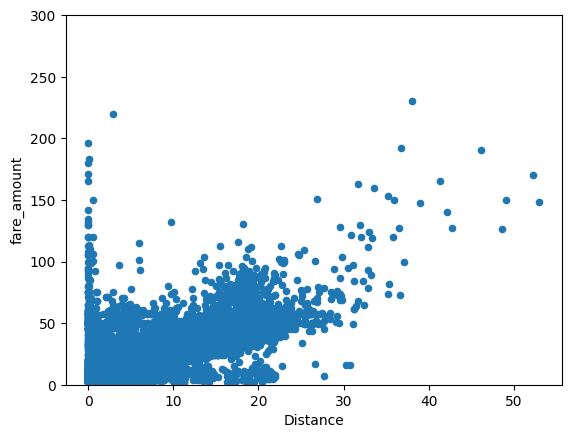

In [15]:
var = 'Distance'
data = pd.concat([dataset['fare_amount'], dataset[var]], axis=1)
data.plot.scatter(x=var, y='fare_amount', ylim=(0,300))

Remove Outliers using Box-Plot method

In [16]:
number_of_columns = len(dataset.columns)
number_of_columns

8

<AxesSubplot: >

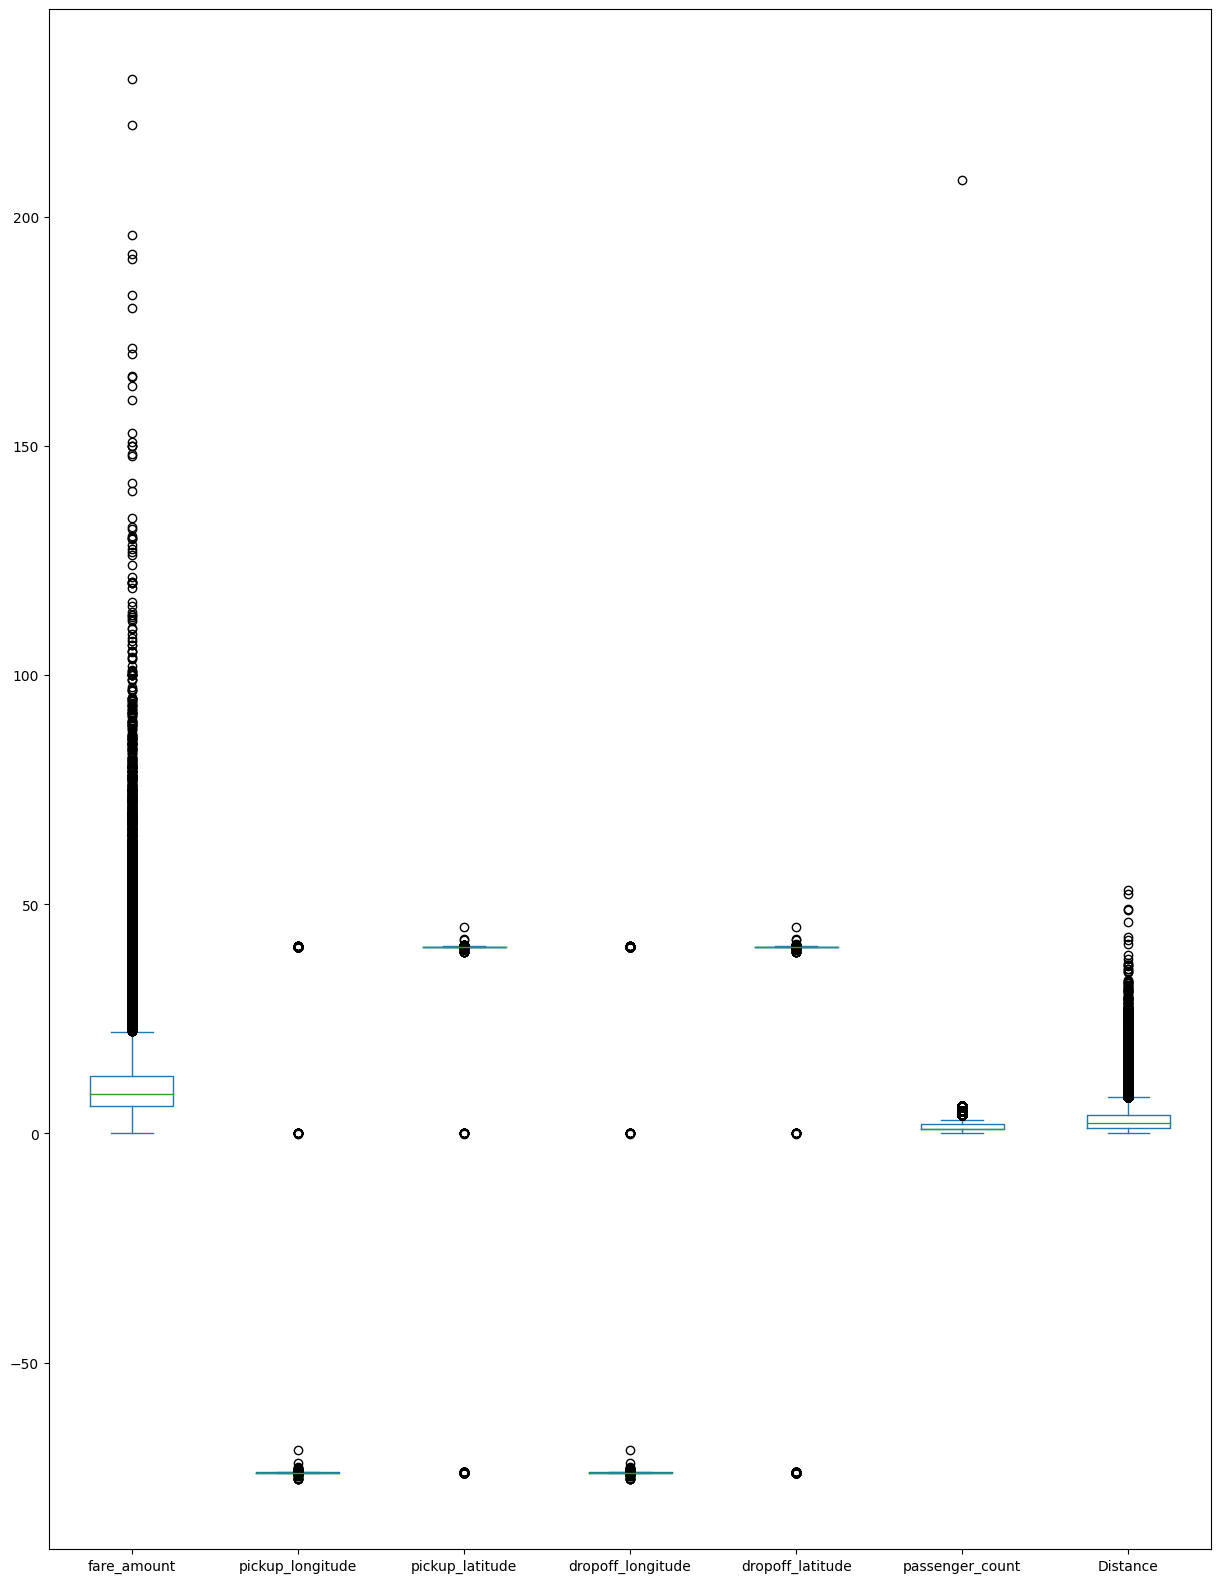

In [17]:
dataset.plot(kind='box',subplots=False,layout=(7,2),figsize=(15,20)) #subplots means we want everything in one graph so false
                                                                     #layout means grid size #fig size greater than layout size

fare_amount             AxesSubplot(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     AxesSubplot(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         AxesSubplot(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    AxesSubplot(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        AxesSubplot(0.125,0.560732;0.352273x0.0939024)
passenger_count      AxesSubplot(0.547727,0.560732;0.352273x0.0939024)
Distance                AxesSubplot(0.125,0.448049;0.352273x0.0939024)
dtype: object

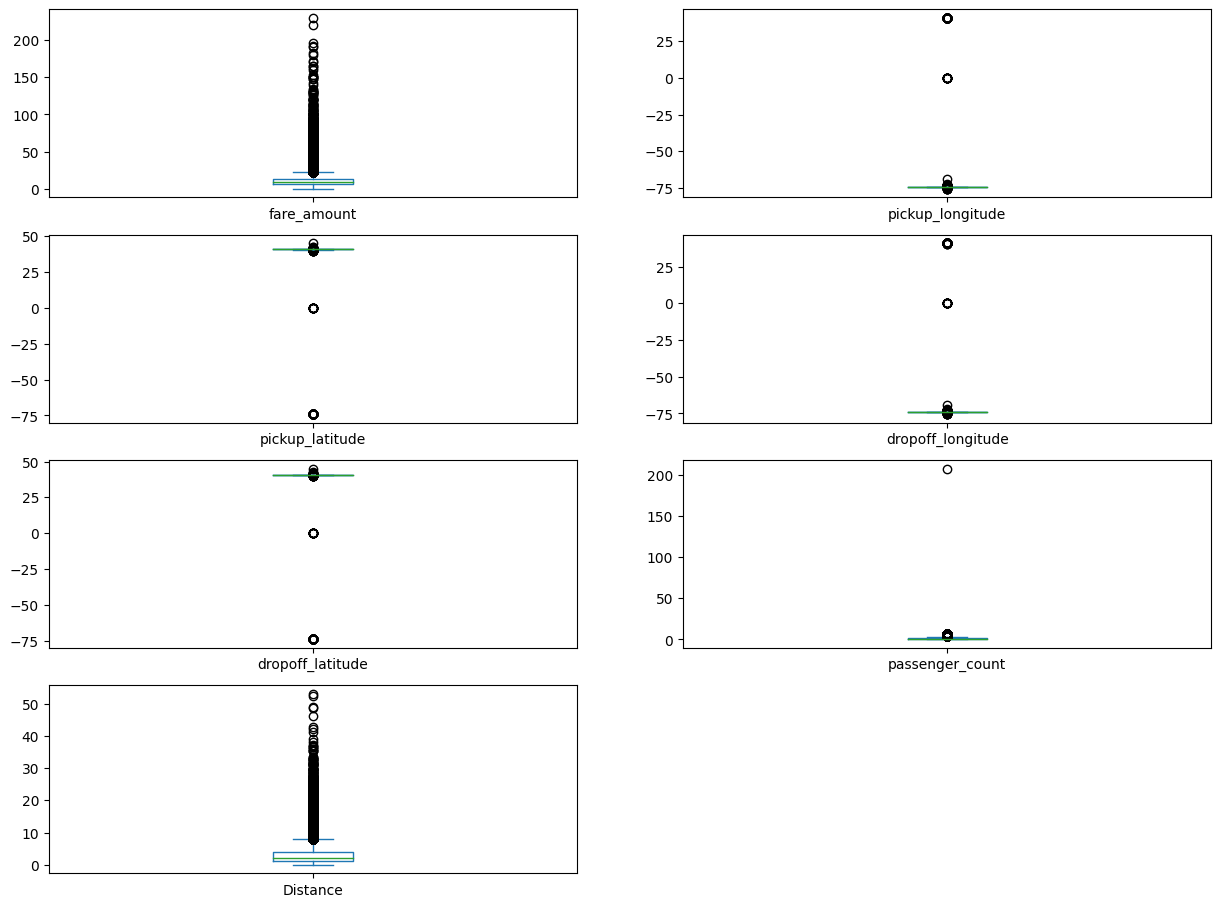

In [18]:
dataset.plot(kind='box',subplots=True,layout=(7,2),figsize=(15,20))

In [19]:
def remove_outliers(df,col):
    Q1 = df[col].quantile(0.25)
    Q2 = df[col].quantile(0.50)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - 1.5*IQR
    maximum = Q3 + 1.5*IQR
    df[col] = np.clip(df[col],minimum,maximum)
    return df

def treat_all_outliers(df,col_list):
    for c in col_list:
        print(c)
        df = remove_outliers(df,c)
    return df

In [20]:
dataset

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.681111
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.454363
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.039603
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661442
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.483730
...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,0.112128
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,1.879635
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,12.867916
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,3.536552


In [21]:
df = dataset
df = df.drop(columns=['pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count'],axis=1)
df.head()

,fare_amount,Distance
0,7.5,1.681111
1,7.7,2.454363
2,12.9,5.039603
3,5.3,1.661442
4,16.0,4.483730


In [22]:
df = treat_all_outliers(df,df.columns)

fare_amount
Distance


fare_amount       AxesSubplot(0.125,0.807358;0.352273x0.0726415)
Distance       AxesSubplot(0.547727,0.807358;0.352273x0.0726415)
dtype: object

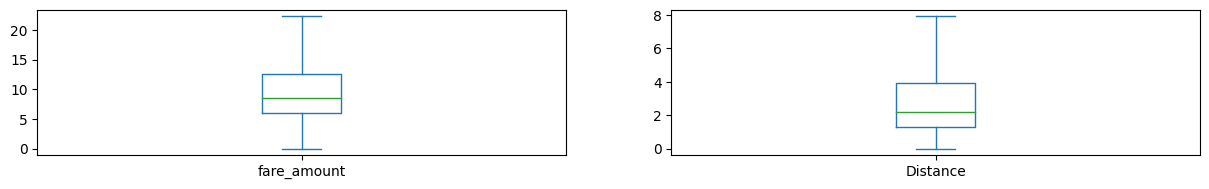

In [23]:
df.plot(kind='box',subplots=True,layout=(9,2),figsize=(15,20))

<AxesSubplot: xlabel='Distance', ylabel='fare_amount'>

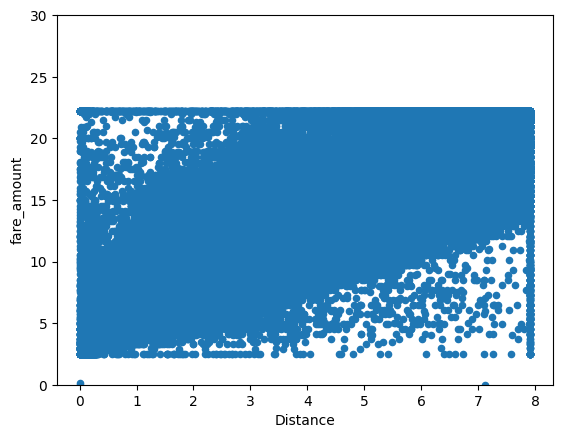

In [24]:
var = 'Distance'
data = pd.concat([df['fare_amount'], df[var]], axis=1)
data.plot.scatter(x=var, y='fare_amount', ylim=(0,30))

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fare_amount,193852.0,10.094433,5.428371,0.010000,6.000000,8.500000,12.500000,22.250000
Distance,193852.0,2.928868,2.199718,0.000084,1.280334,2.179571,3.935953,7.919382


In [26]:
corr = df.corr()
corr

,fare_amount,Distance
fare_amount,1.000000,0.881702
Distance,0.881702,1.000000


In [27]:
X = df['Distance'].values
X

array([1.681111  , 2.454363  , 5.039603  , ..., 7.91938188, 3.536552  ,
       5.410678  ])

In [28]:
y = df['fare_amount'].values
y

array([ 7.5 ,  7.7 , 12.9 , ..., 22.25, 14.5 , 14.1 ])

In [29]:
numeric_value = df.select_dtypes(include=np.number)

numeric_value.columns

Index(['fare_amount', 'Distance'], dtype='object')

In [30]:
correlation = numeric_value.corr()
print(correlation['fare_amount'].sort_values(ascending=False),'\n')

fare_amount    1.000000
Distance       0.881702
Name: fare_amount, dtype: float64 



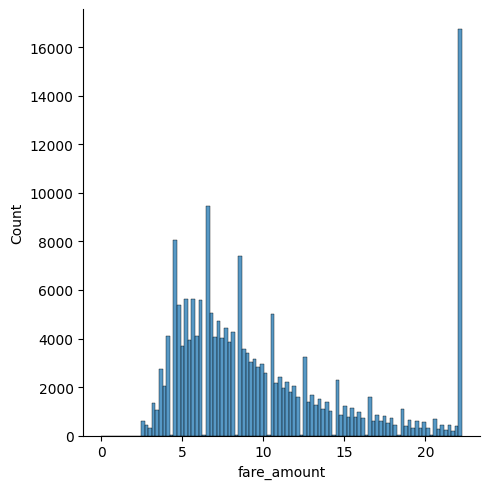

In [31]:
#histogram
sns.displot(df['fare_amount'])

<AxesSubplot: >

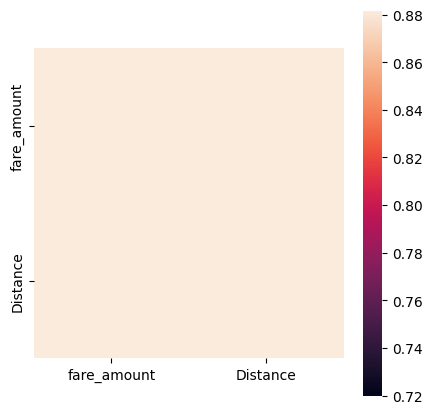

In [32]:
#correlation matrix
f, ax = plt.subplots(figsize=(5,5)) #row,column
sns.heatmap(correlation,square=True,vmax=0.8)



Index(['fare_amount', 'Distance'], dtype='object')


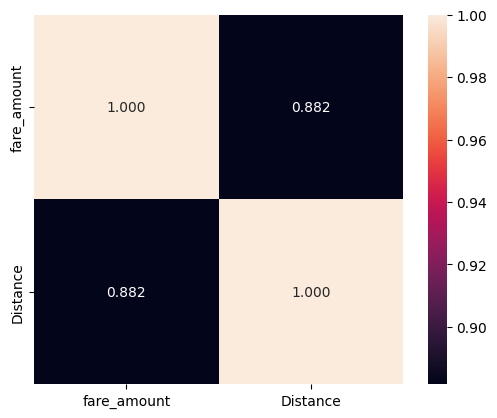

In [33]:
k = 9
cols = correlation.nlargest(k,'fare_amount')['fare_amount'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.3f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

SPLITTING DATA

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,train_size=0.8,random_state=0)

In [35]:
X_train

array([2.14092 , 7.648747, 3.09208 , ..., 1.616162, 0.912219, 3.406722])

In [36]:
X_test

array([0.960901, 2.06953 , 4.810567, ..., 2.542421, 0.207231, 1.114436])

In [37]:
X_train=X_train.reshape(-1, 1)
X_test=X_test.reshape(-1,1)

STANDARDIZATION

In [38]:
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# X_train_ = sc_X.fit_transform(X_train)
# X_test_ = sc_X.transform(X_test)


In [39]:
# Y_train_ = Y_train.reshape(-1,1)
# Y_test_ = Y_test.reshape(-1,1)

In [40]:
# sc_Y = StandardScaler()
# Y_train_ = sc_Y.fit_transform(Y_train_)
# Y_test_ = sc_Y.transform(Y_test_)

In [41]:
# df_Xtrain = pd.DataFrame(X_train_, columns = ['Distance'])
# df_Ytrain = pd.DataFrame(Y_train_,columns=['fare_amount'])

In [42]:
# horizontal_stack = pd.concat([df_Xtrain, df_Ytrain], axis=1)
# horizontal_stack


In [43]:
# horizontal_stack.corr(method='pearson')

Model

In [44]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,Y_train)

LinearRegression()

In [45]:
Y_test

array([ 5. ,  6.9, 10.1, ..., 10. ,  8.9,  5.3])

In [46]:
y_pred = regression.predict(X_test)
y_pred

array([ 5.81226666,  8.22569574, 14.19279421, ...,  9.25515545,
        4.17156531,  6.14650456])

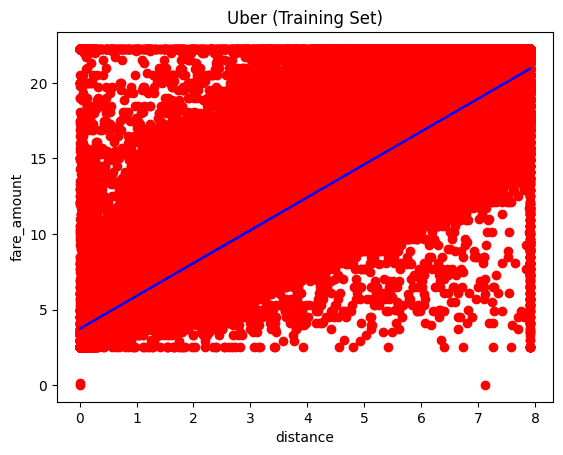

In [47]:
plt.scatter(X_train,Y_train,color='red')
plt.plot(X_train,regression.predict(X_train),color='blue')
plt.title("Uber (Training Set)")
plt.xlabel("distance")
plt.ylabel("fare_amount")
plt.show()

RMSE

In [48]:
import math

def rmse(x,y): return math.sqrt(((np.round(x)-y)**2).mean())

def print_score(m):
    
    print('training error ....')
    print(rmse(m.predict(X_train), Y_train))
    print('validataion error .....')
    print(rmse(m.predict(X_test), Y_test))
    
    print('print R2 score ... ')
    print(m.score(X_train, Y_train), m.score(X_test, Y_test))

In [49]:
print_score(regression)

training error ....
2.5678764866265866
validataion error .....
2.594996110377741
print R2 score ... 
0.7784649286621983 0.7731189220649131


In [85]:
Y_train.describe()

count    155081.000000
mean         10.097848
std           5.429896
min           0.010000
25%           6.000000
50%           8.500000
75%          12.500000
max          22.250000
Name: fare_amount, dtype: float64

In [50]:
errors = abs(y_pred - Y_test)
mape = 100 * (errors / Y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 80.22 %.


R_SQUARE

In [51]:

from sklearn.metrics import r2_score

In [52]:
r2 = r2_score(Y_test, y_pred)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.7731189220649131


Model with New Feature 

In [53]:
dataset.pickup_datetime=pd.to_datetime(dataset.pickup_datetime,errors='coerce',utc=True)
dataset['hour'] = dataset.pickup_datetime.dt.hour
dataset['day'] = dataset['pickup_datetime'].dt.day
dataset['month'] = dataset.pickup_datetime.dt.month
dataset['year'] = dataset.pickup_datetime.dt.year
dataset['Hourly_Segments'] = dataset.hour.map({0:'H1',1:'H1',2:'H1',3:'H1',4:'H2',5:'H2',6:'H2',7:'H2',8:'H3',
                                     9:'H3',10:'H3',11:'H3',12:'H4',13:'H4',14:'H4',15:'H4',16:'H5',
                                     17:'H5',18:'H5',19:'H5',20:'H6',21:'H6',22:'H6',23:'H6'})

In [54]:
dataset.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,hour,day,month,year
count,193852.000000,193852.000000,193852.000000,193852.000000,193852.000000,193852.000000,193852.000000,193852.000000,193852.000000,193852.000000,193852.000000
mean,11.342339,-73.910646,40.688488,-73.909666,40.688802,1.685017,3.351774,13.487728,15.705146,6.281906,2011.745393
std,9.649192,2.685211,2.629493,2.685299,2.629820,1.388614,3.601411,6.515754,8.687891,3.440563,1.860093
min,0.010000,-75.387785,-74.015515,-75.417737,-74.015750,0.000000,0.000084,0.000000,1.000000,1.000000,2009.000000
25%,6.000000,-73.992279,40.736440,-73.991600,40.735307,1.000000,1.280334,9.000000,8.000000,3.000000,2010.000000
50%,8.500000,-73.982130,40.753288,-73.980568,40.753732,1.000000,2.179571,14.000000,16.000000,6.000000,2012.000000
75%,12.500000,-73.968462,40.767527,-73.965520,40.768325,2.000000,3.935953,19.000000,23.000000,9.000000,2013.000000
max,230.000000,40.808425,45.031653,40.831932,45.031598,208.000000,52.999201,23.000000,31.000000,12.000000,2015.000000


In [55]:
new_df = dataset
new_df = dataset.drop(columns=['pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','Hourly_Segments'],axis=1)
new_df.head()

,fare_amount,Distance,hour,day,month,year
0,7.5,1.681111,19,7,5,2015
1,7.7,2.454363,20,17,7,2009
2,12.9,5.039603,21,24,8,2009
3,5.3,1.661442,8,26,6,2009
4,16.0,4.483730,17,28,8,2014


fare_amount       AxesSubplot(0.125,0.807358;0.352273x0.0726415)
Distance       AxesSubplot(0.547727,0.807358;0.352273x0.0726415)
hour              AxesSubplot(0.125,0.720189;0.352273x0.0726415)
day            AxesSubplot(0.547727,0.720189;0.352273x0.0726415)
month             AxesSubplot(0.125,0.633019;0.352273x0.0726415)
year           AxesSubplot(0.547727,0.633019;0.352273x0.0726415)
dtype: object

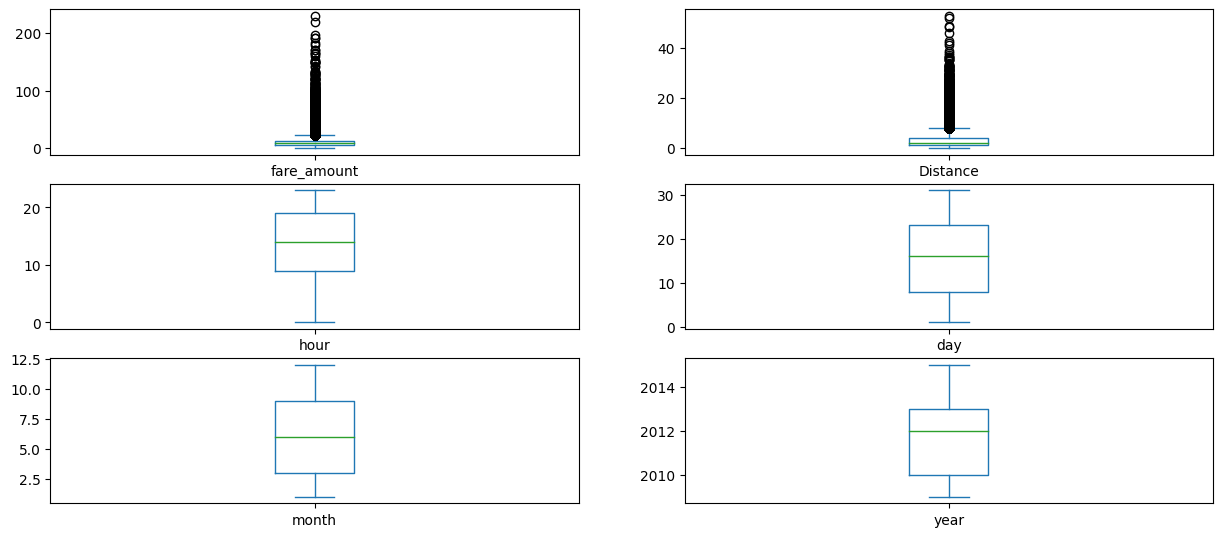

In [56]:
new_df.plot(kind='box',subplots=True,layout=(9,2),figsize=(15,20))

In [57]:
new_df = treat_all_outliers(new_df,new_df.columns)

fare_amount
Distance
hour
day
month
year


fare_amount       AxesSubplot(0.125,0.807358;0.352273x0.0726415)
Distance       AxesSubplot(0.547727,0.807358;0.352273x0.0726415)
hour              AxesSubplot(0.125,0.720189;0.352273x0.0726415)
day            AxesSubplot(0.547727,0.720189;0.352273x0.0726415)
month             AxesSubplot(0.125,0.633019;0.352273x0.0726415)
year           AxesSubplot(0.547727,0.633019;0.352273x0.0726415)
dtype: object

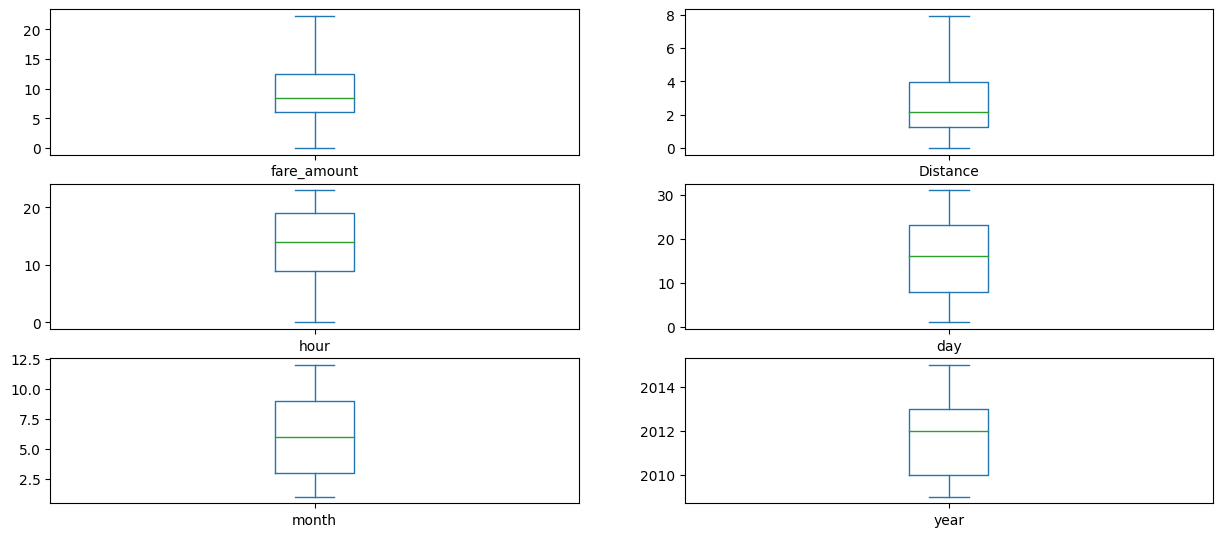

In [58]:
new_df.plot(kind='box',subplots=True,layout=(9,2),figsize=(15,20))

In [59]:
numeric_value = new_df.select_dtypes(include=np.number)

numeric_value.columns

Index(['fare_amount', 'Distance', 'hour', 'day', 'month', 'year'], dtype='object')

In [60]:
correlation = numeric_value.corr()
print(correlation['fare_amount'].sort_values(ascending=False),'\n')

fare_amount    1.000000
Distance       0.881702
year           0.142199
month          0.031114
day            0.003387
hour          -0.023413
Name: fare_amount, dtype: float64 



In [61]:
new_df


,fare_amount,Distance,hour,day,month,year
0,7.50,1.681111,19,7,5,2015
1,7.70,2.454363,20,17,7,2009
2,12.90,5.039603,21,24,8,2009
3,5.30,1.661442,8,26,6,2009
4,16.00,4.483730,17,28,8,2014
...,...,...,...,...,...,...
199995,3.00,0.112128,10,28,10,2012
199996,7.50,1.879635,1,14,3,2014
199997,22.25,7.919382,0,29,6,2009
199998,14.50,3.536552,14,20,5,2015


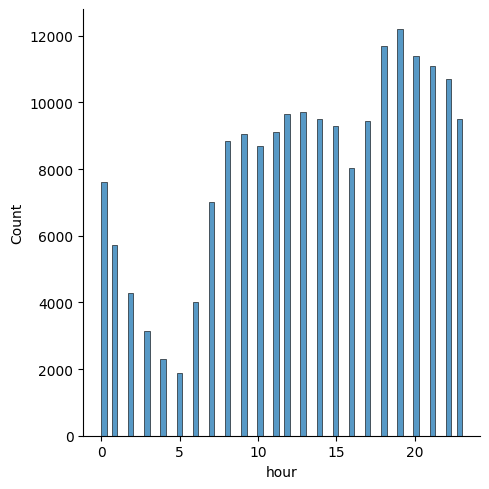

In [62]:
sns.displot(new_df['hour'])

In [63]:
x = new_df.iloc[:,1:]
x

,Distance,hour,day,month,year
0,1.681111,19,7,5,2015
1,2.454363,20,17,7,2009
2,5.039603,21,24,8,2009
3,1.661442,8,26,6,2009
4,4.483730,17,28,8,2014
...,...,...,...,...,...
199995,0.112128,10,28,10,2012
199996,1.879635,1,14,3,2014
199997,7.919382,0,29,6,2009
199998,3.536552,14,20,5,2015


In [64]:
y = new_df.iloc[:,0]
y

0          7.50
1          7.70
2         12.90
3          5.30
4         16.00
          ...  
199995     3.00
199996     7.50
199997    22.25
199998    14.50
199999    14.10
Name: fare_amount, Length: 193852, dtype: float64

<AxesSubplot: xlabel='hour', ylabel='fare_amount'>

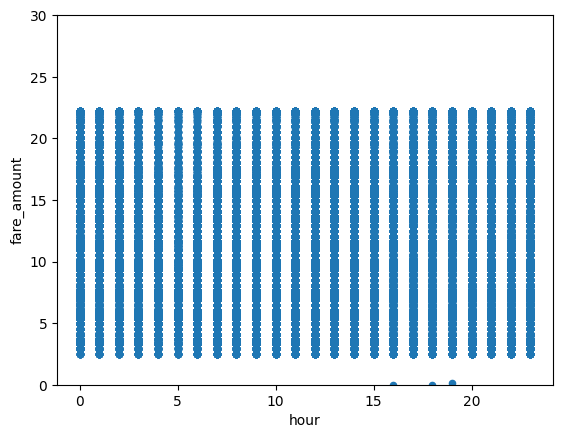

In [65]:
var = 'hour'
data = pd.concat([new_df['fare_amount'], new_df[var]], axis=1)
data.plot.scatter(x=var, y='fare_amount', ylim=(0,30))

<AxesSubplot: xlabel='year', ylabel='fare_amount'>

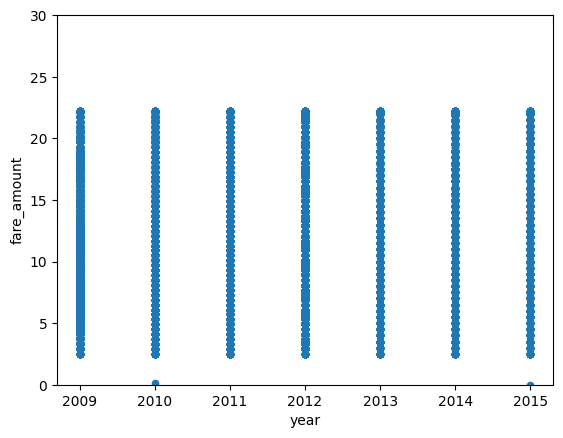

In [66]:
var = 'year'
data = pd.concat([new_df['fare_amount'], new_df[var]], axis=1)
data.plot.scatter(x=var, y='fare_amount', ylim=(0,30))

In [67]:
new_df.year.describe()

count    193852.000000
mean       2011.745393
std           1.860093
min        2009.000000
25%        2010.000000
50%        2012.000000
75%        2013.000000
max        2015.000000
Name: year, dtype: float64

In [68]:
new_df.fare_amount.describe()

count    193852.000000
mean         10.094433
std           5.428371
min           0.010000
25%           6.000000
50%           8.500000
75%          12.500000
max          22.250000
Name: fare_amount, dtype: float64

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [70]:
x

,Distance,hour,day,month,year
0,1.681111,19,7,5,2015
1,2.454363,20,17,7,2009
2,5.039603,21,24,8,2009
3,1.661442,8,26,6,2009
4,4.483730,17,28,8,2014
...,...,...,...,...,...
199995,0.112128,10,28,10,2012
199996,1.879635,1,14,3,2014
199997,7.919382,0,29,6,2009
199998,3.536552,14,20,5,2015


STANDARDIZE

In [71]:
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.transform(X_test)

In [72]:
# Y_test = Y_test.values.reshape(-1,1)
# Y_train = Y_train.values.reshape(-1,1)

In [73]:
# sc_Y = StandardScaler()
# Y_test = sc_Y.fit_transform(Y_test)
# Y_train = sc_Y.fit_transform(Y_train)

TRAINING MODEL

In [74]:
from sklearn.linear_model import LinearRegression
rf = LinearRegression()
rf.fit(X_train,Y_train)

LinearRegression()

In [75]:
X_test

,Distance,hour,day,month,year
94894,0.960901,21,6,10,2012
57378,2.069530,8,24,8,2011
9703,4.810567,15,15,2,2010
36272,4.463131,19,20,2,2010
100741,0.573403,1,17,2,2014
...,...,...,...,...,...
166574,5.516347,2,6,4,2011
198708,3.640351,2,24,6,2011
84364,2.542421,16,21,9,2012
62678,0.207231,20,6,4,2011


In [76]:
X_train

,Distance,hour,day,month,year
125950,2.140920,22,30,3,2009
198026,7.648747,23,15,3,2010
95958,3.092080,14,13,6,2009
78415,7.919382,12,3,8,2011
183117,4.147330,19,6,5,2011
...,...,...,...,...,...
157169,3.805618,0,30,6,2011
182605,3.063285,11,29,7,2011
121721,1.616162,15,9,5,2013
179217,0.912219,8,14,3,2011


In [77]:
Y_train

125950     6.50
198026    17.30
95958      6.90
78415     22.25
183117    13.30
          ...  
157169     9.70
182605    10.50
121721    18.00
179217     6.90
44907     12.00
Name: fare_amount, Length: 155081, dtype: float64

In [78]:

testing = np.array([1.114,0,2,12,2021])
testing

array([1.114e+00, 0.000e+00, 2.000e+00, 1.200e+01, 2.021e+03])

In [79]:
testing = testing.reshape(1,5)
testing


array([[1.114e+00, 0.000e+00, 2.000e+00, 1.200e+01, 2.021e+03]])

In [86]:
y_pred = rf.predict(X_test)
y_pred

array([ 6.17661808,  8.00622862, 13.30365765, ...,  9.53299982,
        3.82674705,  5.29061172])

In [87]:
Y_test

94894      5.0
57378      6.9
9703      10.1
36272     14.1
100741     4.0
          ... 
166574    10.9
198708     9.7
84364     10.0
62678      8.9
71777      5.3
Name: fare_amount, Length: 38771, dtype: float64

In [88]:
print_score(rf)

training error ....
2.4714058600633044
validataion error .....
2.4985573232843787
print R2 score ... 
0.7952998351518824 0.7901966291148177


In [89]:
errors = abs(y_pred - Y_test)
mape = 100 * (errors / Y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 81.19 %.


In [90]:
r2 = r2_score(Y_test, y_pred)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.7901966291148177


Using SVM

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC  #this is classification we need prediction
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, Y_train)
 
prediction = svc_model.predict(X_test)
# check the accuracy on the training set
print(svc_model.score(X_train, Y_train))
print(svc_model.score(X_test, Y_test))

ValueError: Unknown label type: 'continuous'

In [ ]:
#AFTER STANDARDISE WHY NAN AND WHY NEGATIVE RELATIONAL?
#WHEN TO STANDARDISE THE DATA 
#ACCURACY CHECK WHY LESS. EVEN THE DATA IS MINIMISED 